### Import modules

In [6]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../")
import bayseg

### Load the data set

In [7]:
data = []

for i in range(1,3):
    data.append(pd.read_csv("../data/tr32/dataset2/feature_"+str(i)+".csv", header=None).values)
    
data = np.array(data).T.astype("float64")
print(data.shape)

(43, 40, 2)


### Visualizing the data set

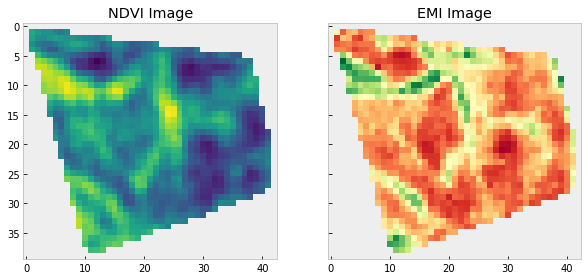

In [8]:
# get min and max of the data
dmin = np.nanmin(data)
dmax = np.nanmax(data)

# create figure
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharex=True, sharey=True)

# plot features onto axes
ax[0].imshow(data[:,:,0].T, cmap="viridis")
ax[0].set_title("NDVI Image")
ax[1].imshow(data[:,:,1].T, cmap="RdYlGn")
ax[1].set_title("EMI Image")

for i in range(2):
    ax[i].grid(False)

Replace NaN feature values

In [9]:
data[np.isnan(data)] = -1

### Instantiate classifier

In [10]:
clf = bayseg.BaySeg(data[:42,:,:], 3, beta_init=10)

### Fit

In [11]:
n_iter = 150
clf.fit(n_iter, beta_jump_length=0.1)

100%|██████████| 150/150 [00:04<00:00, 33.46it/s]


### Diagnostics plot

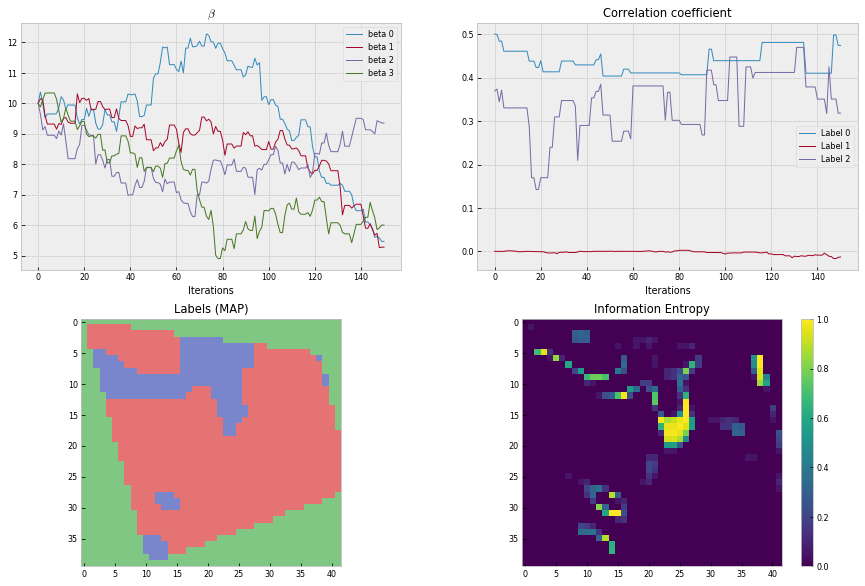

In [12]:
clf.diagnostics_plot(transpose=True)

### Interactive plot

In [8]:
from ipywidgets import interact
import ipywidgets

def plot_iter(i):
    plt.imshow(clf.labels[i].reshape(42,40).T, cmap=bayseg.cmap, norm=bayseg.cmap_norm)
    plt.grid(False)

Run the following code cell and use the interactive slider to move through the segmentation results of different iterations.

In [ ]:
interact(plot_iter, i=ipywidgets.IntSlider(min=0,max=n_iter, step=10,value=0));